### Problem Statement Definition

* Exploring Operating cost of individual power plants
* How fuel costs impact the viability of the different generation sources
* Highlight the competitiveness of renewable electricity 
* To show how the generation mix of different utilities evolved overtime


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Energy_df = pd.read_csv("C:/Users/ezeki/OneDrive/Desktop/fuel_ferc1.csv")

In [3]:
Energy_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


### Data Wrangling

The first and foremost is to get a quick peak into the number records/rows, the number of columns/attributes, column/attribute names, and their data types

In [4]:
Energy_df.count()

record_id                       29523
utility_id_ferc1                29523
report_year                     29523
plant_name_ferc1                29523
fuel_type_code_pudl             29523
fuel_unit                       29343
fuel_qty_burned                 29523
fuel_mmbtu_per_unit             29523
fuel_cost_per_unit_burned       29523
fuel_cost_per_unit_delivered    29523
fuel_cost_per_mmbtu             29523
dtype: int64

In [5]:
print("Number of rows::", Energy_df.shape[0])
print("Number of columns::", Energy_df.shape[1])

Number of rows:: 29523
Number of columns:: 11


In [6]:
print("Column Names::", Energy_df.columns.values.tolist())

Column Names:: ['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']


In [7]:
print("Column Data Types::\n", Energy_df.dtypes)

Column Data Types::
 record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                   int64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object


In [8]:
print("Columns with Missing Values::", Energy_df.columns[Energy_df.isnull().any()].tolist())
print("Number of rows with Missing Values::", len(pd.isnull(Energy_df).any(1).nonzero()[0].tolist()))
print("Sample Indices with Missing data::", pd.isnull(Energy_df).any(1).nonzero()[0].tolist()[0:5])

Columns with Missing Values:: ['fuel_unit']
Number of rows with Missing Values:: 180
Sample Indices with Missing data:: [66, 152, 277, 626, 627]


C:\Users\ezeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
C:\Users\ezeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


With Pandas, subscripting works with both rows and columns. We use isnull() to identify columns containing missing values. The utilities any() and nonzero() provide nice abstractions to identify any row/column conforming to a condition(in this case pointing to rows/columns having missing values).

Quick fact check to get details on non-null rows for each column and the amount of memory consumed by this dataframe

In [9]:
print("General Stats::\n")
print(Energy_df.info())

General Stats::

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null int64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB
None


In [10]:
print("Summary Stats::\n")
Energy_df.describe()

Summary Stats::



,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


### Filtering Data

We have completed our first pass of the dataset at hand and understood what it has and what is missing.

The next stage is about cleanup.

Cleaning up a dataset involves tasks such as removing/handling incorrect or missing data, handling outliers and so on.

Cleaning also involves standardizing attribute column names to make them more readable, intuitive, and conforming to certain standards for everyone involved to understand

In [11]:
#Renaming the column names
Energy_df = Energy_df.rename(columns={"plant_name_ferc1":"power_plant","fuel_type_code_pudl":"fuel_type","fuel_mmbtu_per_unit":"energy_measure_per_unit","fuel_cost_per_unit_burned":"burned_fuel_cost_per_Unit","fuel_cost_per_unit_delivered":"delivered_fuel_cost_per_Unit","fuel_cost_per_mmbtu":"Fuel_cost_per_energy_measure"})

In [12]:
Energy_df.head()

,record_id,utility_id_ferc1,report_year,power_plant,fuel_type,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


In [13]:
Energy_df.record_id.unique().shape

(29523,)

### Subsetting Observations

In [14]:
print("Subsetting based on offset from top (bottom)::")
Energy_df1 = Energy_df.iloc[20000:].reset_index(drop=True) #df.tail(-20000)
Energy_df1.shape

Subsetting based on offset from top (bottom)::


(9523, 11)

In [15]:
print("Subsetting based on offset from bottom (top)::")
Energy_df2 = Energy_df.iloc[0:20000].reset_index(drop=True) #df.tail(20000)
Energy_df2.shape

Subsetting based on offset from bottom (top)::


(20000, 11)

In [16]:
#Joining data. Retain only rows in both sides
pd.merge(Energy_df1, Energy_df2, how="inner")

,record_id,utility_id_ferc1,report_year,power_plant,fuel_type,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure


In [17]:
#Join data. Retain all values, all rows
pd.merge(Energy_df1, Energy_df2, how="outer")

,record_id,utility_id_ferc1,report_year,power_plant,fuel_type,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure
0,f1_fuel_2010_12_44_5_10,44,2010,st. clair,gas,mcf,2449,1.008000,7.640,7.443,7.578
1,f1_fuel_2010_12_44_5_11,44,2010,st. clair,oil,bbl,51,5.813892,82.230,97.488,14.144
2,f1_fuel_2010_12_44_5_13,44,2010,delray,gas,mcf,366759,1.010000,5.265,4.745,5.204
3,f1_fuel_2010_12_44_6_1,44,2010,belle river,gas,mcf,1441346,1.009000,5.075,4.975,5.031
4,f1_fuel_2010_12_151_0_1,151,2010,allegany station 133,gas,mcf,344735,1.027000,5.658,4946.000,6.054
5,f1_fuel_2010_12_151_0_10,151,2010,station 9,gas,mcf,37369,1.028000,5.091,5.247,5.636
6,f1_fuel_2010_12_50_0_1,50,2010,"electric energy, inc",coal,ton,4843857,16.842000,34.620,33.910,2.080
7,f1_fuel_2010_12_12_0_1,12,2010,ben french station,coal,ton,119400,16.128000,19.880,19.780,1.420
8,f1_fuel_2010_12_12_0_2,12,2010,ben french station,oil,bbl,772,5.880000,64.340,64.340,10.940
9,f1_fuel_2010_12_12_0_3,12,2010,ben french station,gas,mcf,4020,0.980000,6.050,6.050,6.600


In [43]:
#Join matching rows from Energy_df1 to Energy_df2 
pd.merge(Energy_df1, Energy_df2, how="left")

,record_id,utility_id_ferc1,report_year,power_plant,fuel_type,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure
0,f1_fuel_2010_12_44_5_10,44,2010,st. clair,gas,mcf,2449,1.008000,7.640,7.443,7.578
1,f1_fuel_2010_12_44_5_11,44,2010,st. clair,oil,bbl,51,5.813892,82.230,97.488,14.144
2,f1_fuel_2010_12_44_5_13,44,2010,delray,gas,mcf,366759,1.010000,5.265,4.745,5.204
3,f1_fuel_2010_12_44_6_1,44,2010,belle river,gas,mcf,1441346,1.009000,5.075,4.975,5.031
4,f1_fuel_2010_12_151_0_1,151,2010,allegany station 133,gas,mcf,344735,1.027000,5.658,4946.000,6.054
5,f1_fuel_2010_12_151_0_10,151,2010,station 9,gas,mcf,37369,1.028000,5.091,5.247,5.636
6,f1_fuel_2010_12_50_0_1,50,2010,"electric energy, inc",coal,ton,4843857,16.842000,34.620,33.910,2.080
7,f1_fuel_2010_12_12_0_1,12,2010,ben french station,coal,ton,119400,16.128000,19.880,19.780,1.420
8,f1_fuel_2010_12_12_0_2,12,2010,ben french station,oil,bbl,772,5.880000,64.340,64.340,10.940
9,f1_fuel_2010_12_12_0_3,12,2010,ben french station,gas,mcf,4020,0.980000,6.050,6.050,6.600


In [44]:
#Join matching rows from Energy_df1 to Energy_df2
pd.merge(Energy_df1, Energy_df2, how="right")

,record_id,utility_id_ferc1,report_year,power_plant,fuel_type,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000000,2.770,2.770,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933,23.922000,44.240,43.250,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260,0.064094,28.770,0.000,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133,24.840000,58.540,55.130,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520,24.290000,33.970,34.650,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233,22.484000,28.730,28.110,1.278


In [18]:
#Checking to see if both dataframe sum up to the expected length
assert len(Energy_df) == (len(Energy_df1) + len(Energy_df2))

In [19]:
print("Select Specific row indices::")
Energy_df.iloc[[10,501,20]]

Select Specific row indices::


,record_id,utility_id_ferc1,report_year,power_plant,fuel_type,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure
10,f1_fuel_1994_12_4_0_2,4,1994,units 1-3,gas,mcf,262720,1.026,1.940,1.940,13.900
501,f1_fuel_1994_12_194_2_10,194,1994,edgewater unit 3,coal,ton,151845,20.228,35.870,33.520,1.773
20,f1_fuel_1994_12_6_1_7,6,1994,mountainr,coal,ton,2837040,24.526,39.911,38.717,1.627


In [20]:
print("Subsetting based on logical condition(s)::")
Energy_df[Energy_df.energy_measure_per_unit>20].head()

Subsetting based on logical condition(s)::


,record_id,utility_id_ferc1,report_year,power_plant,fuel_type,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.65
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.97
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933,23.922,44.24,43.25,1.85
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133,24.840,58.54,55.13,2.36
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520,24.290,33.97,34.65,1.40


In [21]:
Energy_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
power_plant                       0
fuel_type                         0
fuel_unit                       180
fuel_qty_burned                   0
energy_measure_per_unit           0
burned_fuel_cost_per_Unit         0
delivered_fuel_cost_per_Unit      0
Fuel_cost_per_energy_measure      0
dtype: int64

Missing values identified on fuel_unit about 180 

##### Imputing Missing Values

In [22]:
#Using groupby to count the sum of each unique value in the fuel unit column
Energy_df.groupby('fuel_unit')['fuel_unit'].count()
Energy_df[['fuel_unit']] = Energy_df[['fuel_unit']].fillna(value='mcf')

In [23]:
print(Energy_df.isnull().sum())

record_id                       0
utility_id_ferc1                0
report_year                     0
power_plant                     0
fuel_type                       0
fuel_unit                       0
fuel_qty_burned                 0
energy_measure_per_unit         0
burned_fuel_cost_per_Unit       0
delivered_fuel_cost_per_Unit    0
Fuel_cost_per_energy_measure    0
dtype: int64


##### Handling duplicate values

In [24]:
Energy_df.duplicated().any()

False

In [25]:
duplicate_rows_df = Energy_df[Energy_df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 11)


### Data Summarization

Preparing a compact representation of raw data at hand

The most widely used form of summarization is to group values based on certain conditions or attributes.

#### Grouping values based on certain conditions or attributes

In [26]:
Energy_df.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [27]:
Energy_df.groupby('fuel_type').first()

,record_id,utility_id_ferc1,report_year,power_plant,fuel_unit,fuel_qty_burned,energy_measure_per_unit,burned_fuel_cost_per_Unit,delivered_fuel_cost_per_Unit,Fuel_cost_per_energy_measure
fuel_type,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438,0.015939,34.180,34.180,1.072


In [28]:
Energy_df.power_plant.value_counts().reset_index().head(n=10)

,index,power_plant
0,big stone,156
1,four corners,151
2,riverside,133
3,coyote,121
4,louisa,119
5,hayden,99
6,lake road,93
7,ben french station,93
8,independence,91
9,oklaunion,90


Above is the list of the top ten(10) power plant

In [29]:
print('Mean value for big stone power plant')
print(Energy_df['burned_fuel_cost_per_Unit'][Energy_df['power_plant']=='big stone'].mean())

Mean value for big stone power plant
40.75306410256409


In [30]:
print(Energy_df.groupby(['fuel_type'])['burned_fuel_cost_per_Unit'].sum())

fuel_type
coal        576254.381
gas         156891.829
nuclear    4053318.428
oil        1361824.819
other         3048.394
waste         8607.492
Name: burned_fuel_cost_per_Unit, dtype: float64


#### multiple aggregations on single attribute

In [31]:
Energy_df.groupby(['fuel_type'])['burned_fuel_cost_per_Unit'].agg([np.sum, np.mean, np.count_nonzero])

,sum,mean,count_nonzero
fuel_type,,,
coal,576254.381,67.421830,8535.0
gas,156891.829,13.659397,11458.0
nuclear,4053318.428,4955.157002,674.0
oil,1361824.819,168.877086,7970.0
other,3048.394,18.253856,165.0
waste,8607.492,19.518122,433.0


In [32]:
Energy_df.groupby(['fuel_type', 'fuel_unit']).agg({'energy_measure_per_unit':np.mean, 'Fuel_cost_per_energy_measure': np.max})

energy_measure_per_unit  Fuel_cost_per_energy_measure
fuel_type fuel_unit                                                       
coal      bbl                      12.098000                       1.09900
          mcf                      22.064321                       5.34100
          mmbtu                    19.292346                       2.61600
          ton                      20.764231                       6.89500
gas       bbl                       1.028500                       4.01900
          mcf                       1.022072                      34.97479
          mmbtu                     1.002436                      10.86400
          ton                       1.023334                       6.25100
nuclear   gramsU                   24.931841                     107.00000
          kgU                       3.201433                      60.60000
          mcf                      38.438193                       0.72600
          mmbtu                    10.416599                      68.83600
          mwdth                     8.963048                       1.07800
          mwhth                     6.794154                      93.75600
oil       bbl                       5.815249                      33.00000
          gal                       5.723313                      26.05300
          mcf                       5.823003                      28.69000
          ton                       5.881806                       5.34800
other     bbl                       0.161129                       4.55700
          gal                       0.136795                      23.51700
          mcf                       1.946794                    3515.92400
          ton                       0.011249                       5.52300
waste     bbl                       0.138500                       0.64000
          mcf                       0.107250                       0.80000
          ton                       0.343774                  359278.00000

In [33]:
Energy_df.groupby(['fuel_type', 'fuel_unit','power_plant']).agg({'Fuel_cost_per_energy_measure': {'total_price': np.sum, 'mean_cost':np.mean,'variance_price':np.std,'count':np.count_nonzero}, 'energy_measure_per_unit':np.sum}) 

C:\Users\ezeki\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fuel_cost_per_energy_measure  \
                                                          total_price   
fuel_type fuel_unit power_plant                                         
coal      bbl       big stone                                   1.099   
          mcf       barry                                       3.621   
                    cayuga                                      2.629   
                    chesapeake                                  3.700   
                    chesterfield                                3.490   
                    daniel                                      3.001   
                    e.w. brown                                  2.400   
                    edwardsport                                 2.240   
                    ernest c gaston                             2.654   
                    ernest c. gaston                           32.797   
                    gallagher                                   2.442   
                    ghent                                       2.320   
                    gibson                                      2.927   
                    green river                                 2.070   
                    hunter unit no. 3                           1.007   
                    independence                                2.998   
                    independence unit 2                         8.167   
                    meredosia                                   1.546   
                    noblesville                                 2.803   
                    pineville                                   2.170   
                    respondent's portion                        2.160   
                    tyrone                                      2.490   
                    unit 4                                      4.607   
                    units 1 - 3                                 4.124   
                    wabash river                                3.399   
                    yorktown                                    3.640   
          mmbtu     * big cajun 2 unit 3                        1.726   
                    * independence                              1.550   
                    * white bluff                               1.756   
                    *roy s. nelson unit6                        1.413   
...                                                               ...   
waste     ton       lake road                                 314.865   
                    mcneil                                      2.830   
                    merrimack                                   1.100   
                    nd unit1                                    0.132   
                    nelson dewey 1 & 2                         -0.705   
                    nelson dewey 1 and 2                       14.835   
                    nelson dewey u 1&2                         -4.867   
                    nelson dewey unit 1                        13.678   
                    nelson dewey unit 2                        10.425   
                    nelsondewey units1&2                        0.132   
                    ottumwa                                     1.710   
                    pittsylvania                               34.700   
                    pittsysvania                                0.315   
                    polyester                                  17.570   
                    r.m. heskett                               13.974   
                    r.m.heskett contin.                         1.272   
                    rock river                                 -2.000   
                    rock river 1 & 2                           -1.918   
                    rock river unit 1                          -4.769   
                    rock river unit 2                          -6.732   
                    rock river units 1&2                       -1.642   
                    rothsc

### Data Visualization

Text(0.5, 1.0, 'Fuel cost Trend for Coal')

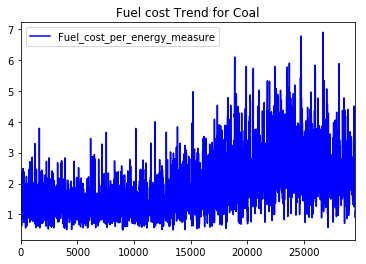

In [34]:
Energy_df[Energy_df.fuel_type == 'coal'][['Fuel_cost_per_energy_measure']].plot(style='blue')
plt.title('Fuel cost Trend for Coal')

Interpretation 

It is observed from the above plot displayed that the trend for cost of coal per energy measured increased

Text(0.5, 1.0, 'Fuel cost Trend for Coal over time')

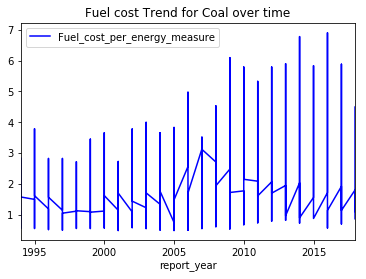

In [35]:
Energy_df[Energy_df.fuel_type == 'coal' ].plot(x='report_year', y='Fuel_cost_per_energy_measure', style='blue')
plt.title('Fuel cost Trend for Coal over time')

### Bar Plots

Text(0.5, 1.0, 'Fuel cost burned per unit in reporting year')

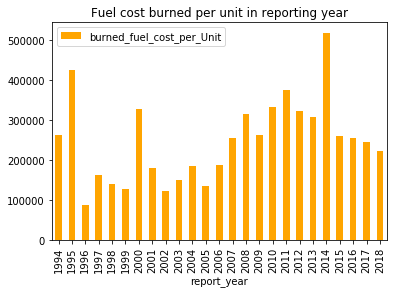

In [36]:
Energy_df[['report_year', 
              'burned_fuel_cost_per_Unit']].groupby('report_year').sum().plot.bar(color='orange')
plt.title('Fuel cost burned per unit in reporting year')

Interpretation

Fuel cost burned per unit was highest in 2014 after 19 years in the reporting year.

Text(0.5, 1.0, 'Delivered Fuel cost per unit in reporting year')

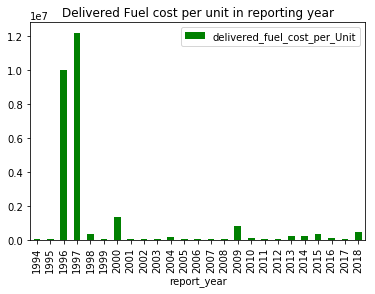

In [37]:
Energy_df[['report_year', 
              'delivered_fuel_cost_per_Unit']].groupby('report_year').sum().plot.bar(color='green')
plt.title('Delivered Fuel cost per unit in reporting year')

Interpretation

The delivered fuel cost per unit in reporting year was highest in 1996 and 1997 in the distribution

Text(0.5, 1.0, 'Fuel cost per energy measure in reporting year')

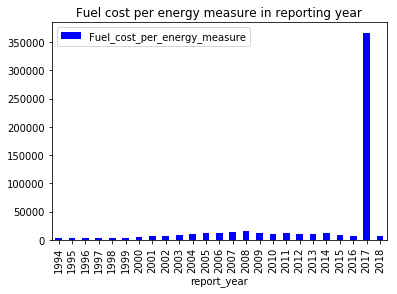

In [38]:
Energy_df[['report_year', 
              'Fuel_cost_per_energy_measure']].groupby('report_year').sum().plot.bar(color='blue')
plt.title('Fuel cost per energy measure in reporting year')

Interpretation

Overall fuel cost per energy measure in reporting year was highest in 2017, this reveals that the cost of fuel was high in price across the different fuel types 

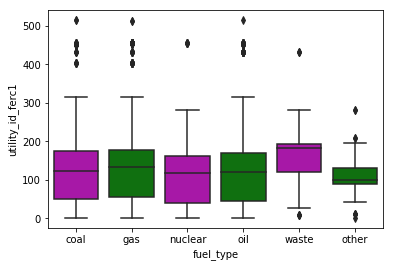

In [39]:
#Box Plot
import seaborn as sns
sns.boxplot(x="fuel_type", y="utility_id_ferc1", palette=["m", "g"], data=Energy_df)

Interpretation 

Using the graph, we can compare the and distribution of the utility_id_ferc1 for the different fuel type (coal, gas, nuclear, oil, waste and other). We observe that there is a greater variability for the different fuel type as well as larger outliers.

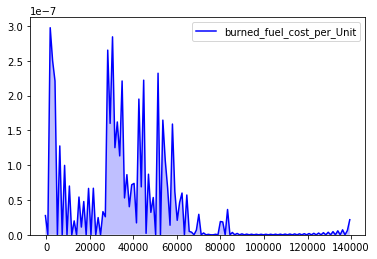

In [40]:
#KDE Plot
sns.kdeplot(Energy_df['burned_fuel_cost_per_Unit'], shade=True, color="b")

The shape of the data distribution, and one which has variance (i.e., changes much less in response to differences in sampling) for Burned fuel cost per unit.